# Example 1: Intersecting Gaussians

### function to sample from the product of two guassian

In [87]:
from scipy.stats import multivariate_normal
def sample_from_product_gaussian(mu1, Sigma1, mu2, Sigma2, n_samples):
    """
    Sample from the product of two Gaussian distributions.

    Parameters:
    mu1 (array): Mean vector of the first Gaussian distribution.
    Sigma1 (array): Covariance matrix of the first Gaussian distribution.
    mu2 (array): Mean vector of the second Gaussian distribution.
    Sigma2 (array): Covariance matrix of the second Gaussian distribution.
    n_samples (int): Number of samples to draw from the resulting Gaussian.

    Returns:
    array: Samples from the resulting product Gaussian distribution.
    """
    # Calculate the inverse of the covariances
    Sigma1_inv = np.linalg.inv(Sigma1)
    Sigma2_inv = np.linalg.inv(Sigma2)

    # Calculate the covariance of the resulting distribution
    Sigma3_inv = Sigma1_inv + Sigma2_inv
    Sigma3 = np.linalg.inv(Sigma3_inv)

    # Calculate the mean of the resulting distribution
    mu3 = Sigma3.dot(Sigma1_inv.dot(mu1) + Sigma2_inv.dot(mu2))

    # Create the resulting Gaussian distribution
    resulting_distribution = multivariate_normal(mean=mu3, cov=Sigma3)

    # Sample from the resulting distribution
    samples = resulting_distribution.rvs(size=n_samples)

    return samples

### make the two Gaussian distributions and plot some samples

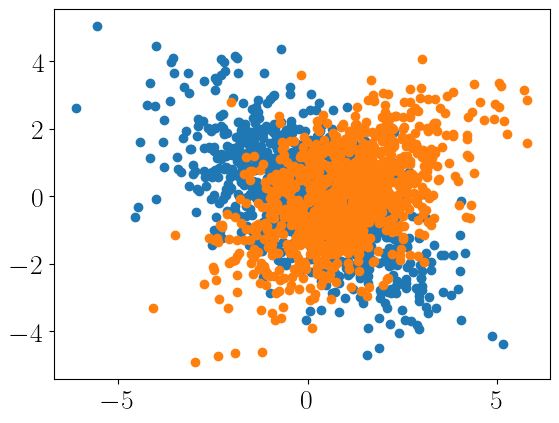

In [88]:
import numpy as np
from matplotlib import pyplot as plt

mean1 = np.zeros(2)
mean2 = np.array([1,0])

cov1 = np.array([[1, 0], [0, 4]])
cov2 = np.array([[3, 0], [0, 1]])

# Rotation angle
theta = np.pi / 4  # 45 degrees in radians

# Rotation matrix
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Function to rotate covariance matrix
def rotate_covariance(cov, R):
    return R @ cov @ R.T

# Rotate cov1 and cov2
cov1 = rotate_covariance(cov1, R)
cov2 = rotate_covariance(cov2, R)

samples1 = np.random.multivariate_normal(mean1, cov1, 1000)
samples2 = np.random.multivariate_normal(mean2, cov2, 1000)
plt.scatter(samples1[:,0], samples1[:,1])
plt.scatter(samples2[:,0], samples2[:,1])

### Run CombineHarvester

In [89]:
from CombineHarvester import Harvest
from CombineHarvester import Combine
import getdist.plots as gdplt
from getdist import MCSamples


num_samples = 20000


#sample from the distributions
wheat_chain = np.random.multivariate_normal(mean1, cov1, num_samples)
barley_chain = np.random.multivariate_normal(mean2, cov2, num_samples)
truth_chains = sample_from_product_gaussian(mean1, cov1, mean2, cov2, num_samples)

#initiate the the class
Wheat = Harvest('output/Wheat', chain = wheat_chain, n_flows = 7) 
Barley = Harvest('output/Barley', chain = barley_chain, n_flows = 7)


#train the flows
Wheat.harvest()
Barley.harvest()

#combine
Grain = Combine(Wheat, Barley)
wheat_weights, barley_weights = Grain.combine()



Training the flows


 11%|████▌                                     | 11/100 [00:10<01:24,  1.05it/s, train=2.6226556, val=2.656232 (Max patience reached)]


Training the flows


  6%|██▌                                        | 6/100 [00:07<01:53,  1.21s/it, train=2.704172, val=2.7276511 (Max patience reached)]


### Make the plots

In [90]:
plt.rc('text', usetex=True)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


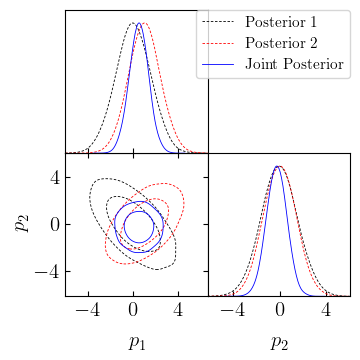

In [91]:
import getdist.plots as gdplt
from getdist import MCSamples

wheat = MCSamples(samples=wheat_chain)
barley = MCSamples(samples=barley_chain)
weighted_wheat =  MCSamples(samples=wheat_chain, weights=wheat_weights)
weighted_barley =  MCSamples(samples=barley_chain, weights=barley_weights)
truth = MCSamples(samples=truth_chains)

g = gdplt.get_subplot_plotter()

g.settings.axes_fontsize = 18  
g.settings.lab_fontsize = 18    
g.settings.legend_fontsize = 14 

line_styles = ['--', '--', '-']
g.triangle_plot([wheat, barley, truth], filled=False, \
                legend_labels=['Posterior 1', 'Posterior 2',  'Joint Posterior'], contour_ls=line_styles )

plt.savefig('plots/toy_1.pdf')
plt.show()

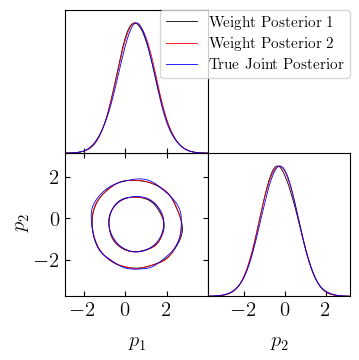

In [92]:
g.triangle_plot([weighted_wheat, weighted_barley, truth], filled=False, \
                legend_labels=['Weight Posterior 1', 'Weight Posterior 2',  ' True Joint Posterior'])
plt.savefig('plots/toy_1_posteriors.pdf')
plt.show()

# Example 2: Gaussians in Tension

### make the two Gaussians and draw some samples

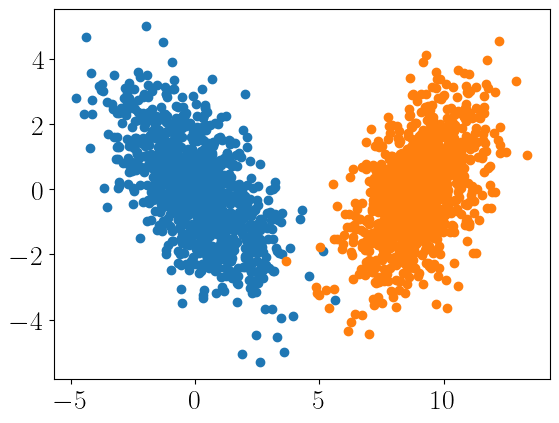

In [93]:
import numpy as np
from matplotlib import pyplot as plt

mean1 = np.zeros(2)
mean2 = np.array([9,0])

cov1 = np.array([[1, 0], [0, 4]])
cov2 = np.array([[3, 0], [0, 1]])

# Rotation angle
theta = np.pi / 4  # 45 degrees in radians

# Rotation matrix
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Function to rotate covariance matrix
def rotate_covariance(cov, R):
    return R @ cov @ R.T

# Rotate cov1 and cov2
cov1 = rotate_covariance(cov1, R)
cov2 = rotate_covariance(cov2, R)

samples1 = np.random.multivariate_normal(mean1, cov1, 1000)
samples2 = np.random.multivariate_normal(mean2, cov2, 1000)
plt.scatter(samples1[:,0], samples1[:,1])
plt.scatter(samples2[:,0], samples2[:,1])

### Run CombineHarvester

In [94]:

num_samples = 20000


#sample from the distributions
wheat_chain = np.random.multivariate_normal(mean1, cov1, num_samples)
barley_chain = np.random.multivariate_normal(mean2, cov2, num_samples)
truth_chains = sample_from_product_gaussian(mean1, cov1, mean2, cov2, num_samples)

#initiate the the class
Wheat = Harvest('output/Wheat', chain = wheat_chain, n_flows = 7) 
Barley = Harvest('output/Barley', chain = barley_chain, n_flows = 7)


#train the flows
Wheat.harvest()
Barley.harvest()

#combine
Grain = Combine(Wheat, Barley)
wheat_weights, barley_weights = Grain.combine()



Training the flows


 17%|███████▏                                  | 17/100 [00:14<01:10,  1.18it/s, train=2.6281824, val=2.629406 (Max patience reached)]


Training the flows


 17%|███████▏                                  | 17/100 [00:14<01:10,  1.17it/s, train=2.6964848, val=2.714153 (Max patience reached)]


### Make some plots

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


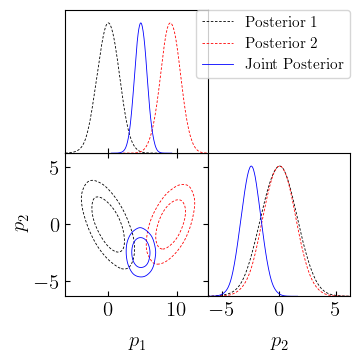

In [95]:
import getdist.plots as gdplt
from getdist import MCSamples

wheat = MCSamples(samples=wheat_chain)
barley = MCSamples(samples=barley_chain)
weighted_wheat =  MCSamples(samples=wheat_chain, weights=wheat_weights)
weighted_barley =  MCSamples(samples=barley_chain, weights=barley_weights)
truth = MCSamples(samples=truth_chains)

g = gdplt.get_subplot_plotter()

g.settings.axes_fontsize = 18  
g.settings.lab_fontsize = 18    
g.settings.legend_fontsize = 14 

line_styles = ['--', '--', '-']
g.triangle_plot([wheat, barley, truth], filled=False, \
                legend_labels=['Posterior 1', 'Posterior 2',  'Joint Posterior'], contour_ls=line_styles )

plt.savefig('plots/toy_2.pdf')
plt.show()

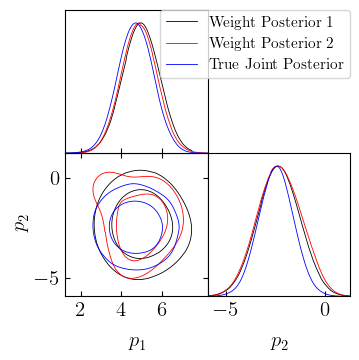

In [96]:
g.triangle_plot([weighted_wheat, weighted_barley, truth], filled=False, \
                legend_labels=['Weight Posterior 1', 'Weight Posterior 2',  ' True Joint Posterior'])
plt.savefig('plots/toy_2_posteriors.pdf')
plt.show()

# Example 3: Undersampling 

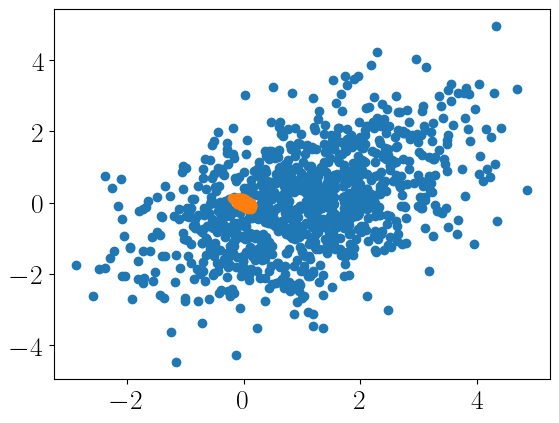

In [100]:
import numpy as np
from matplotlib import pyplot as plt

mean1 = np.zeros(2)
mean2 = np.array([1,0])

cov1 = np.array([[1/1000., 0], [0, 4/1000.]])
cov2 = np.array([[3, 0], [0, 1]])

# Rotation angle
theta = np.pi / 4  # 45 degrees in radians

# Rotation matrix
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Function to rotate covariance matrix
def rotate_covariance(cov, R):
    return R @ cov @ R.T

# Rotate cov1 and cov2
cov1 = rotate_covariance(cov1, R)
cov2 = rotate_covariance(cov2, R)

samples1 = np.random.multivariate_normal(mean1, cov1, 1000)
samples2 = np.random.multivariate_normal(mean2, cov2, 1000)
plt.scatter(samples2[:,0], samples2[:,1])
plt.scatter(samples1[:,0], samples1[:,1])


In [101]:

num_samples = 20000


#sample from the distributions
wheat_chain = np.random.multivariate_normal(mean1, cov1, num_samples)
barley_chain = np.random.multivariate_normal(mean2, cov2, num_samples)
truth_chains = sample_from_product_gaussian(mean1, cov1, mean2, cov2, num_samples)

#initiate the the class
Wheat = Harvest('output/Wheat', chain = wheat_chain, n_flows = 7) 
Barley = Harvest('output/Barley', chain = barley_chain, n_flows = 7)


#train the flows
Wheat.harvest()
Barley.harvest()

#combine
Grain = Combine(Wheat, Barley)
wheat_weights, barley_weights = Grain.combine()



Training the flows


  7%|███                                         | 7/100 [00:07<01:42,  1.10s/it, train=2.629149, val=2.618291 (Max patience reached)]


Training the flows


 12%|████▉                                    | 12/100 [00:11<01:21,  1.08it/s, train=2.7158623, val=2.7114234 (Max patience reached)]


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


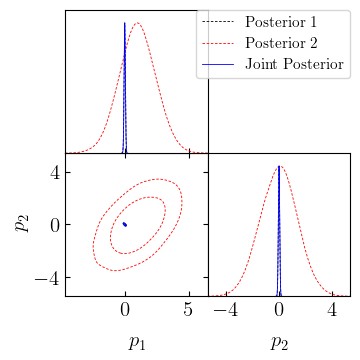

In [102]:
import getdist.plots as gdplt
from getdist import MCSamples

wheat = MCSamples(samples=wheat_chain)
barley = MCSamples(samples=barley_chain)
weighted_wheat =  MCSamples(samples=wheat_chain, weights=wheat_weights)
weighted_barley =  MCSamples(samples=barley_chain, weights=barley_weights)
truth = MCSamples(samples=truth_chains)

g = gdplt.get_subplot_plotter()

g.settings.axes_fontsize = 18  
g.settings.lab_fontsize = 18    
g.settings.legend_fontsize = 14 

line_styles = ['--', '--', '-']
g.triangle_plot([wheat, barley, truth], filled=False, \
                legend_labels=['Posterior 1', 'Posterior 2',  'Joint Posterior'], contour_ls=line_styles )

plt.savefig('plots/toy_3.pdf')
plt.show()

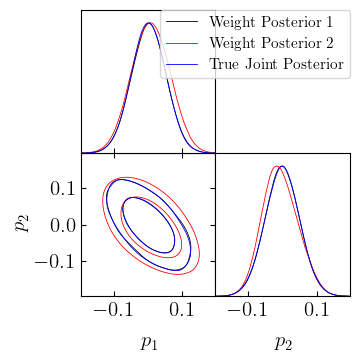

In [103]:
g.triangle_plot([weighted_wheat, weighted_barley, truth], filled=False, \
                legend_labels=['Weight Posterior 1', 'Weight Posterior 2',  ' True Joint Posterior'])
plt.savefig('plots/toy_3_posteriors.pdf')
plt.show()